# Learning with Gradient Descent

In these exercises, you will explore the dynamics of learning in small networks. There are lots of **hyperparameters** to choose when designing a model. Experimenting on simple examples is the best way to get a feeling for how these choices impact the model's performance and convergence speed.

Let's reintroduce the circle dataset. We already know that we will need to use a hidden layer to get good performance, but let's see what other factors affect learning as well.

Using TensorFlow backend.


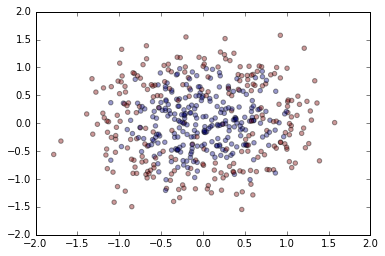

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils

X, y = make_circles(n_samples=500,
                    noise=0.3,
                    factor=0.5)
y = np_utils.to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

plt.scatter(X[:,0], X[:,1], c=y[:,0], alpha=0.4)

## Getting training history

Below we define a simple model with one hidden layer.

Since things become a bit crowded when we make Keras print out information during training, let's turn off output by setting `verbose=0`. Printing information during training also slows down training.

In [2]:
model0 = Sequential()
model0.add(Dense(4, input_dim=2))
model0.add(Activation('relu'))
model0.add(Dense(2))
model0.add(Activation('softmax'))

sgd = SGD(lr=0.04)
model0.compile(loss='categorical_crossentropy',
               optimizer=sgd,
               metrics=['accuracy'])

history0 = model0.fit(X_train, y_train, nb_epoch=5, batch_size=16, verbose=0)

result = model0.evaluate(X_test, y_test, verbose=0)
print 'Test set loss: ', result[0]
print 'Test set accuracy: ', result[1]

Test set loss:  0.695301024437
Test set accuracy:  0.479999995232


Notice that we saved the output of the `model.fit` method this time in the `history0` variable. This history object stores important information about training. You can print it to see what sort of info it has.

In [3]:
history0.history

{'acc': [0.41333333381017051,
  0.38400000023841857,
  0.42400000023841861,
  0.42933333341280622,
  0.48000000047683716],
 'loss': [0.75102135753631594,
  0.72419329786300657,
  0.71057349697748817,
  0.70128956747055049,
  0.69328030411402386]}

## Plotting the loss

It is very useful to look at how the loss function decreases during training. Let's plot the loss for each epoch from the history object.

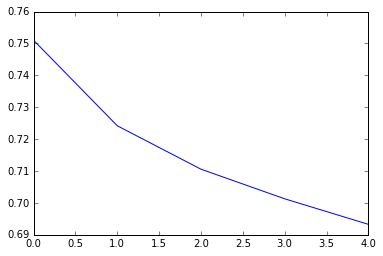

In [4]:
def plot_loss(hist):
    loss = hist.history['loss']
    plt.plot(range(len(loss)), loss)
    
plot_loss(history0)

- - -
### Exercise 1 - Inspect the loss

Great, the loss went down, as expected. But notice that at the end of training, it probably looks like the loss was still headed downward. This might mean that we stopped training too early and that we left some improvements on the table. 

Reset and retrain the model above, but increase the `nb_epoch` argument to train for longer. Afterwards plot the loss. Is the loss still going down? Find a number of epochs that will result in the loss flattening out in the plot
- - - 

NOTE: Remember, this stuff is stochastic! It's best to try different things and run multiple experiments to get a sense of what is happening. When deep learning scientists study the learning properties of neural networks, many times they will do multiple runs of training and average their measurements to detect trends, but we will just eyeball it here.


## Learning rate

The most important hyperparameter that controls learning is the **learning rate**.

Above, we created an optimizer with the line `sgd = SGD(lr=0.04)` - the `lr` parameters is the learning rate. It is hard to know what the learning rate should be to begin with for any given problem, so it takes some experimentation for new problems. Below is a helper function that trains the model above and plots the training set loss when it is done.

In [5]:
def train_and_plot(lr, nb_epoch=20, act='relu'):
    model = Sequential()
    model.add(Dense(4, input_dim=2))
    model.add(Activation(act))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    sgd = SGD(lr=lr)
    model.compile(loss='categorical_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, nb_epoch=nb_epoch, batch_size=16, verbose=0)
    
    result = model.evaluate(X_test, y_test, verbose=0)
    print 'Test set loss: ', result[0]
    print 'Test set accuracy: ', result[1]
    
    plot_loss(history)

The learning rate is the basic knob to turn to control how fast learning take place (how fast the weights change) and the number of epochs controls how long we train. Ideally we want fast learning.

- - -
### Exercise 2 - Trading off learning rate and epochs

Using the `train_and_plot` function we defined above, try a few combinations:

1. Try a large learning rate - can you get the loss plot to look jagged? What is happening in this case?
2. Try an even larger learning rate - can you get the loss to "explode" (i.e. become and stay large)
3. Try a small learning rate - can you get the loss plot to look like a straight line going down? How fast is learning in this case?
4. Comparing to the original settings of learning rate 0.04 and with 20 epochs, can you find a learning rate that makes the loss below 0.5 in less than 10 epochs?
5. If you set the learning rate to 0.008, how many epochs do you need to make the loss drop below 0.5?
6. Try to make your model perform better than 75% test accuracy - what parameters did you use? How good can you do?

TIP: try exploring learning rates across orders of magnitude (0.1, 0.01, 0.001...). Explore combinations of learning rate and number of epochs. Keep in mind the scale of the y axis when interpreting loss plots.
- - -

Test set loss:  0.660052332401
Test set accuracy:  0.591999999523


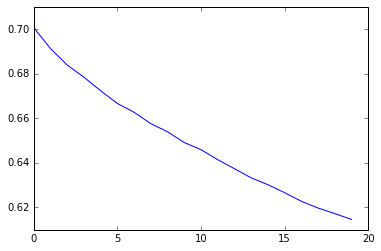

In [6]:
train_and_plot(0.05, 20)

Test set loss:  1.85920625973
Test set accuracy:  0.479999994278


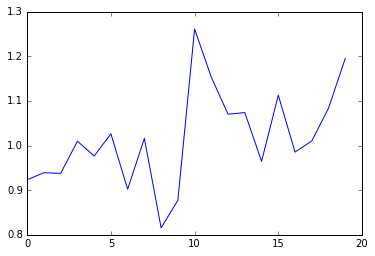

In [7]:
# 1. Jittery plot, lr too large
train_and_plot(5, 20)

Test set loss:  7.73668598938
Test set accuracy:  0.519999998808


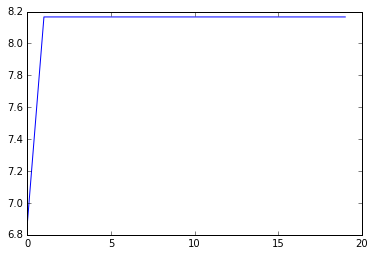

In [8]:
# 2. Loss explosion plot, lr way too large
train_and_plot(20, 20)

Test set loss:  0.643079725266
Test set accuracy:  0.623999998569


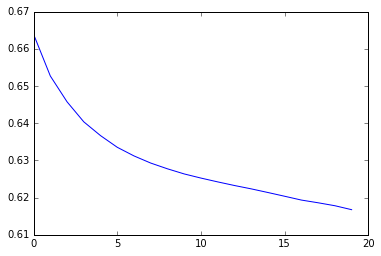

In [9]:
# 3. Small LR, does not flatten
train_and_plot(0.01, 20)

Test set loss:  0.832659455776
Test set accuracy:  0.567999998569


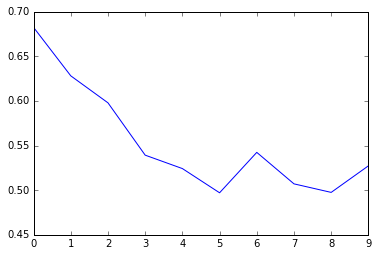

In [10]:
# 4. Good LR, 10 epochs - this is just barely possible
train_and_plot(1.0, 10)

Test set loss:  0.541610981464
Test set accuracy:  0.744000002861


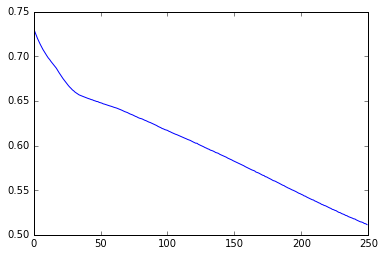

In [11]:
# 5. Low LR, many epochs
train_and_plot(0.008, 250)

Test set loss:  0.503708148003
Test set accuracy:  0.775999993324


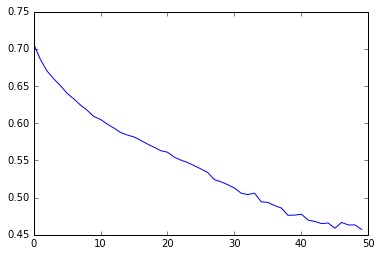

In [12]:
# 6. Better than 75% accuracy - this is somewhat tricky, takes a handful of tries, many solutions possible
train_and_plot(0.1, 50)

## Learning with different activation functions

There are many choices of activation function for neural networks, but they have different properties for learning. Perhaps the two most well-known are the [rectified linear unit (ReLU)](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) and the [sigmoid](https://en.wikipedia.org/wiki/Logistic_function) (also called logistic). An important property of activation functions is their gradient at various points. Let's take a look at how learning works out when using the sigmoid vs the relu activation function on the hidden layer of our model.


- - -
### Exercise 3 - learning with different activation functions

Our `train_and_plot` function accepts an `act` argument to tell it what activation function to use on the hidden layer.

1. For a fixed learning rate, compare the speed of learning (i.e. the number of epochs required to get to a loss value) for the `'relu'` activation vs the `'sigmoid'` activation.
2. Compare to the `'tanh'` activation as well. How does it behave compared to the others?
3. Sigmoids are hard to optimize in general. Can you find a learning rate where the loss is jagged with the sigmoid activation but relatively smooth and well-behaved with relu?

- - - 

Test set loss:  0.628970502377
Test set accuracy:  0.687999994278


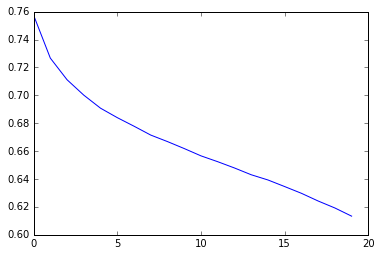

In [13]:
train_and_plot(0.05, nb_epoch=20, act='relu')

Test set loss:  0.693534371376
Test set accuracy:  0.535999998569


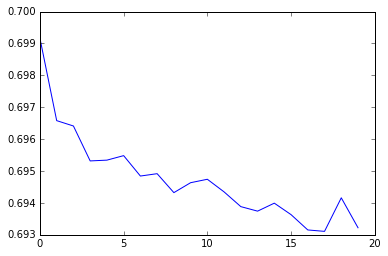

In [14]:
train_and_plot(0.05, nb_epoch=20, act='sigmoid')

Test set loss:  0.676957462311
Test set accuracy:  0.671999993324


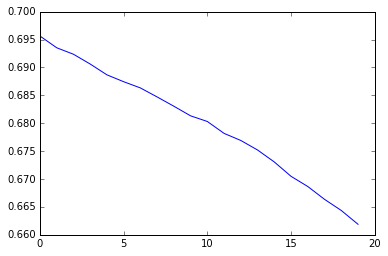

In [15]:
train_and_plot(0.05, nb_epoch=20, act='tanh')